In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
inception=InceptionV3(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [4]:
for layer in inception.layers:
    layer.trainable=False
    

In [5]:
folders=glob('Datasets/train/*')

In [6]:
folders

['Datasets/train/diseased cotton plant',
 'Datasets/train/fresh cotton plant',
 'Datasets/train/diseased cotton leaf',
 'Datasets/train/fresh cotton leaf']

In [7]:
x=Flatten()(inception.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=inception.input,outputs=prediction)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [12]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
61/61 [==============================] - 30s 488ms/step - loss: 0.2326 - accuracy: 0.9703 - val_loss: 0.6153 - val_accuracy: 0.9434
Epoch 2/20
61/61 [==============================] - 30s 498ms/step - loss: 0.3317 - accuracy: 0.9616 - val_loss: 0.7941 - val_accuracy: 0.9434
Epoch 3/20
61/61 [==============================] - 29s 482ms/step - loss: 0.3152 - accuracy: 0.9651 - val_loss: 0.6962 - val_accuracy: 0.9340
Epoch 4/20
61/61 [==============================] - 29s 472ms/step - loss: 0.5155 - accuracy: 0.9477 - val_loss: 0.3637 - val_accuracy: 0.9623
Epoch 5/20
61/61 [==============================] - 30s 489ms/step - loss: 0.3205 - accuracy: 0.9718 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 29s 471ms/step - loss: 0.3279 - accuracy: 0.9682 - val_loss: 0.2809 - val_accuracy: 0.9623
Epoch 7/20
61/61 [==============================] - 30s 496ms/step - loss: 0.5442 - accuracy: 0.9523 - val_loss: 0.0750 - val_accuracy: 0.9906

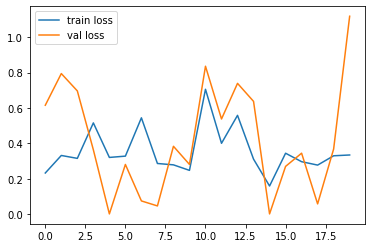

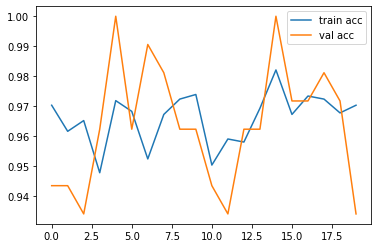

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [16]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')